In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:

from pandas_datareader.data import DataReader
import yfinance as yf
from  pandas_datareader import data as pdr
from datetime import datetime


In [3]:
yf.pdr_override()

In [4]:
## DEFINING ENDING AND START TIME
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:


# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500,AMAZON
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400,AMAZON
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400,AMAZON
2023-11-02,138.729996,138.809998,136.470001,138.070007,138.070007,52236700,AMAZON
2023-11-03,138.990005,139.490005,137.449997,138.600006,138.600006,44007200,AMAZON
2023-11-06,138.759995,140.729996,138.360001,139.740005,139.740005,44970400,AMAZON
2023-11-07,140.550003,143.369995,140.500000,142.710007,142.710007,53553500,AMAZON
2023-11-08,142.970001,143.119995,141.220001,142.080002,142.080002,44521700,AMAZON
2023-11-09,142.020004,142.649994,139.839996,140.600006,140.600006,36168200,AMAZON


### What is the overall trend in the 'Close' prices ?




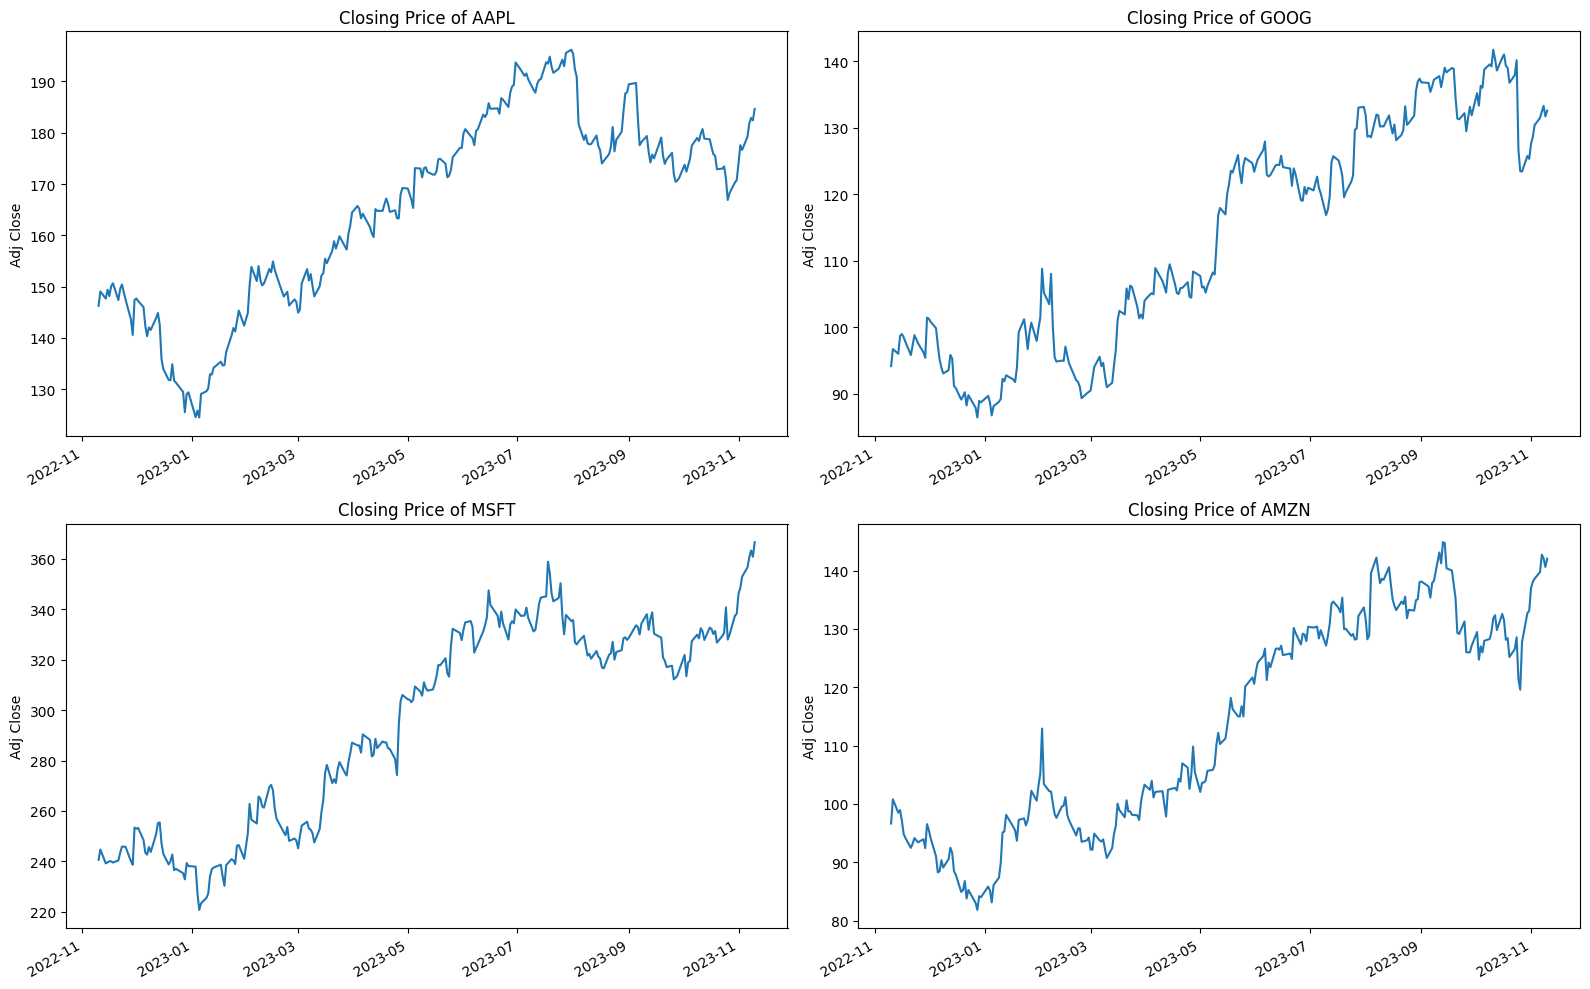

In [6]:
plt.figure(figsize=(16,10))
plt.subplots_adjust(top=1.50,bottom=1.4)
for i, company in enumerate (company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.tight_layout()
plt.savefig('Trends.png')


### Can you calculate and analyze moving averages  for the ' ADJ Close' prices to identify potential long-term trends?

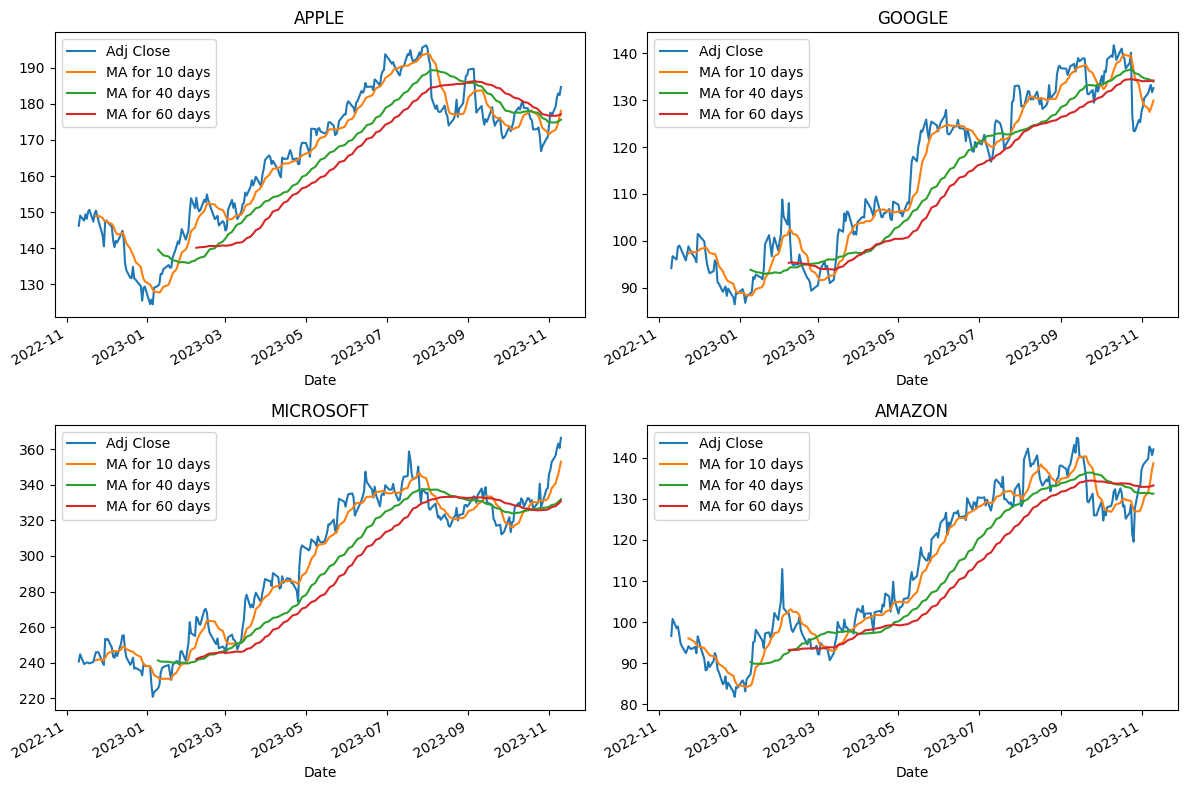

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stock_with_moving_averages(df, ma_days, title, ax):
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Adj Close'].rolling(ma).mean()

    cols_to_plot = ['Adj Close'] + [f'MA for {ma} days' for ma in ma_days]
    df[cols_to_plot].plot(ax=ax)
    ax.set_title(title)

ma_day = [10, 40, 60]
companies = [AAPL, GOOG, MSFT, AMZN]
titles = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    if i < len(companies):
        plot_stock_with_moving_averages(companies[i], ma_day, titles[i], ax)

fig.tight_layout()


plt.savefig('stock_plots.png')

# Show the plot
plt.show()


### daily return

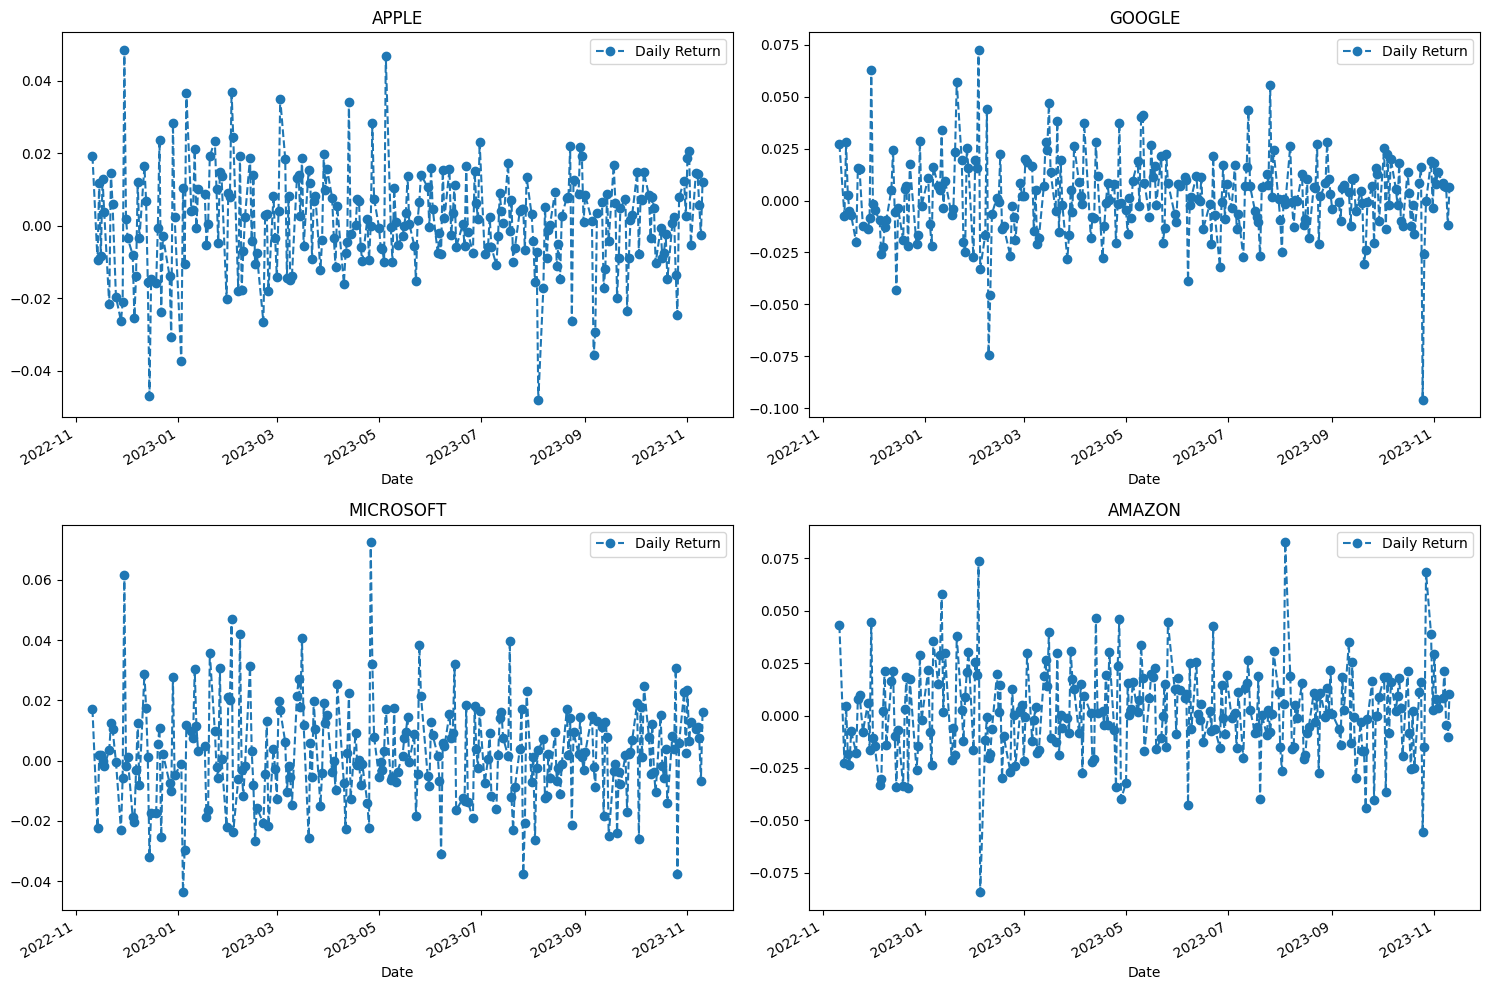

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


company_data = [(AAPL, 'APPLE'), (GOOG, 'GOOGLE'), (MSFT, 'MICROSOFT'), (AMZN, 'AMAZON')]


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (company, name) in enumerate(company_data):

    company['Daily Return'] = company['Adj Close'].pct_change()

    
    ax = axes[i // 2, i % 2]
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(name)


fig.tight_layout()


plt.show()


Average Daily return

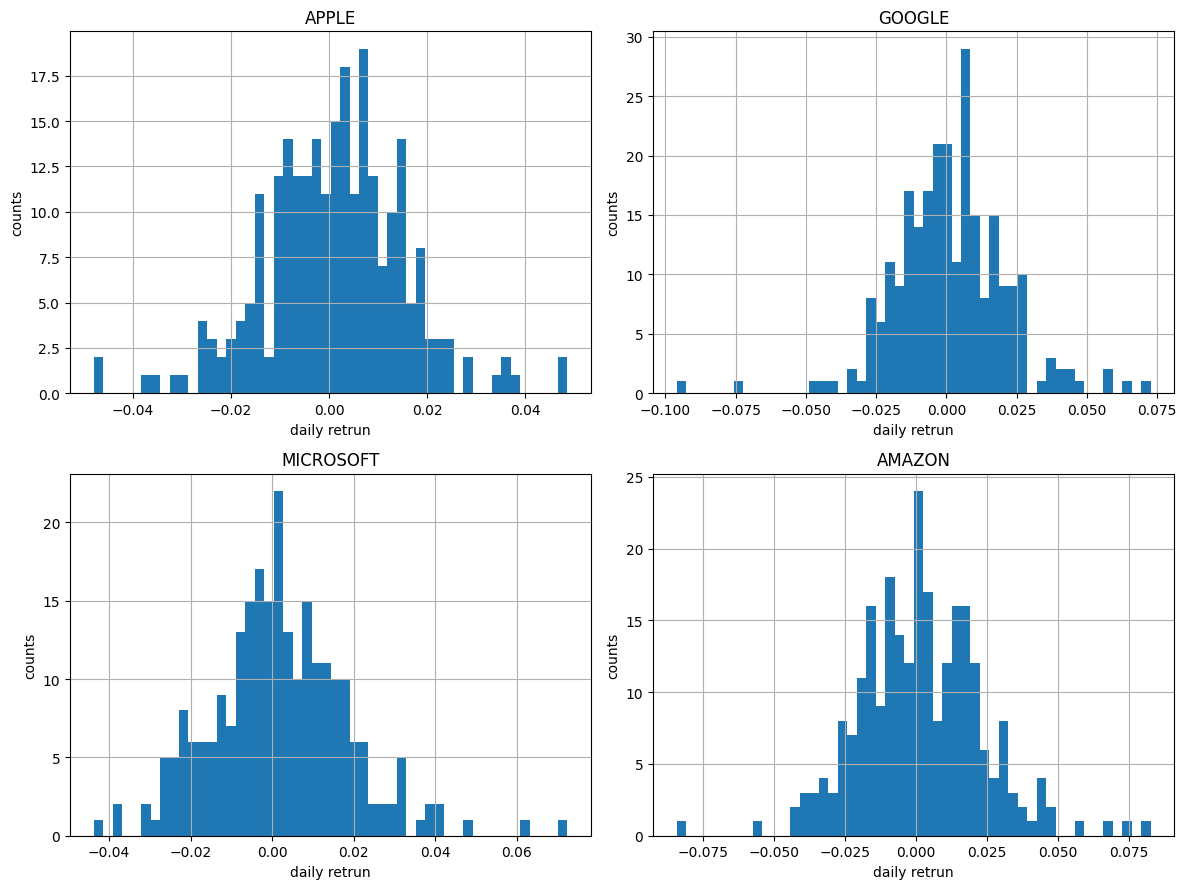

In [9]:
plt.figure(figsize=(12,9))

for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('daily retrun')
    plt.ylabel('counts')
    plt.title(f'{company_name[i-1]}')
plt.tight_layout()
plt.savefig('average daily price.png')



look for correlation

In [10]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']


tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-10,NaN,NaN,NaN,NaN
2022-11-11,0.019269,0.043051,0.027185,0.016997
2022-11-14,-0.009486,-0.022820,-0.007237,-0.022500
2022-11-15,0.011870,0.004569,0.028012,0.001739
2022-11-16,-0.008331,-0.018395,0.002735,0.001823


Google and microsoft

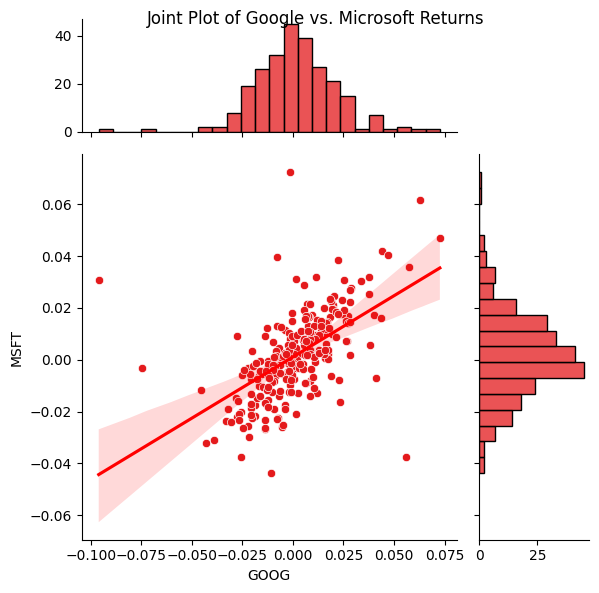

In [11]:

sns.set_palette("Set1")

jointplot = sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', height=6, ratio=3, marginal_ticks=True)

plt.suptitle("Joint Plot of Google vs. Microsoft Returns", fontsize=12)

# Add regression lines
sns.regplot(x='GOOG', y='MSFT', data=tech_rets, scatter=False, ax=jointplot.ax_joint, color='r')
# plt.savefig('Goog vs MSFT.png')


plt.show()


c:\Users\UMER COMPUTERS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


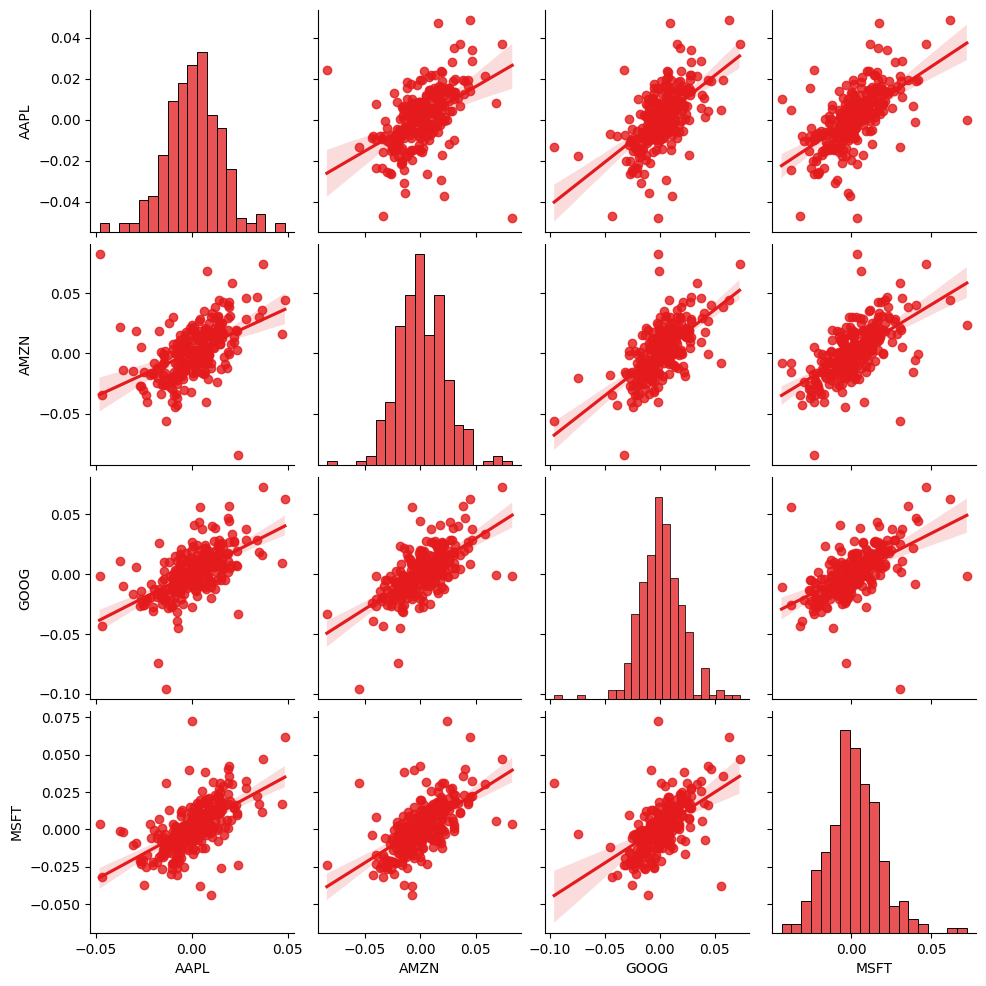

In [12]:
sns.pairplot(tech_rets,kind='reg')
plt.savefig('pairplot.png')
plt.savefig('Pairplot.png')



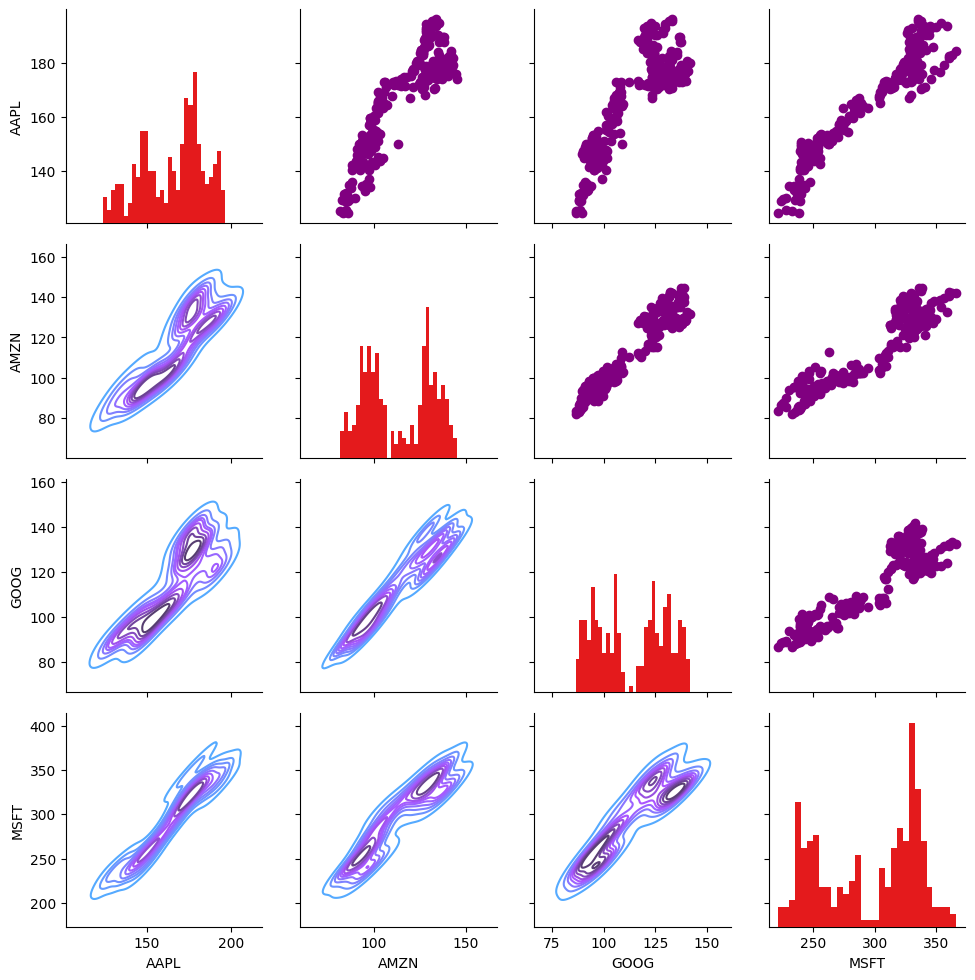

In [13]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
return_fig.map_diag(plt.hist,bins = 30)
plt.savefig('pairgird.png')



correlation of stock returns and stock closing price


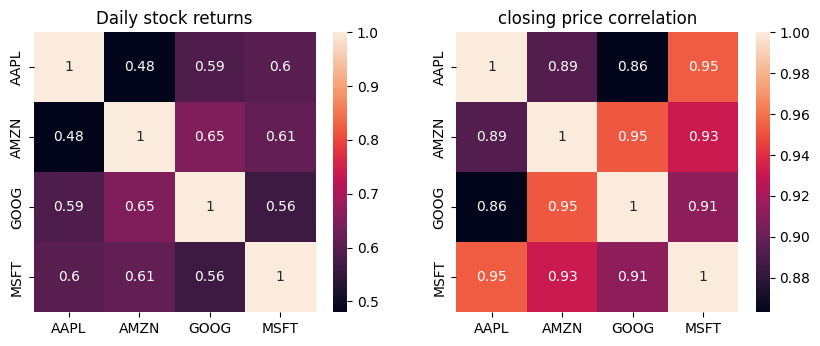

In [14]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(),annot=True)
plt.title('Daily stock returns')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(),annot=True)
plt.title('closing price correlation')
plt.savefig('correlation matrix.png')


Variability of risk on an investment

In [15]:
rets = tech_rets.dropna()

std = rets.std()

In [16]:


## calculating VaR at  confidence interval
VaR = (std *1.96)
print('VaR at 95% Confidence level in %:',
      VaR)

VaR at 95% Confidence level in %: AAPL    0.028110
AMZN    0.042840
GOOG    0.039073
MSFT    0.032686
dtype: float64


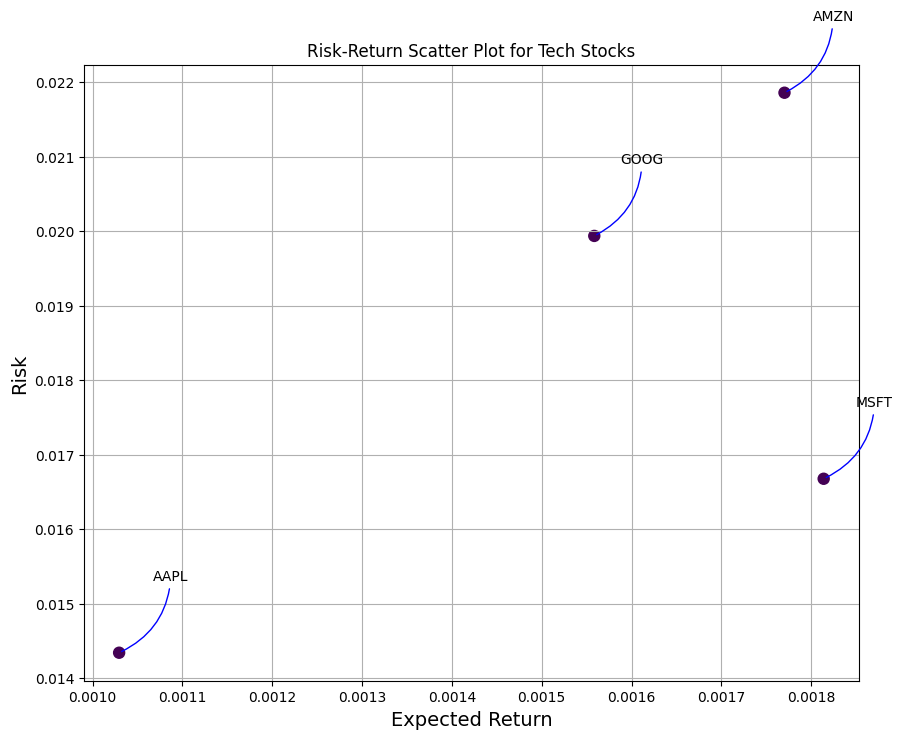

In [17]:
import matplotlib.cm as cm


rets = tech_rets.dropna()

area = np.pi * 20


cmap = cm.viridis

plt.figure(figsize=(10, 8), facecolor='white')
plt.scatter(rets.mean(), rets.std(), s=area, c=cmap(rets.mean()), marker='o')
plt.grid(True)
plt.xlabel('Expected Return', fontsize=14)
plt.ylabel('Risk', fontsize=14)
plt.title('Risk-Return Scatter Plot for Tech Stocks')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.savefig('risk.png')
plt.show()


Stock price Prediction(google)

In [18]:
# get the company's stock data
df = pdr.get_data_yahoo('GOOG', start = '2012-01-01',end = datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400
2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800
2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600


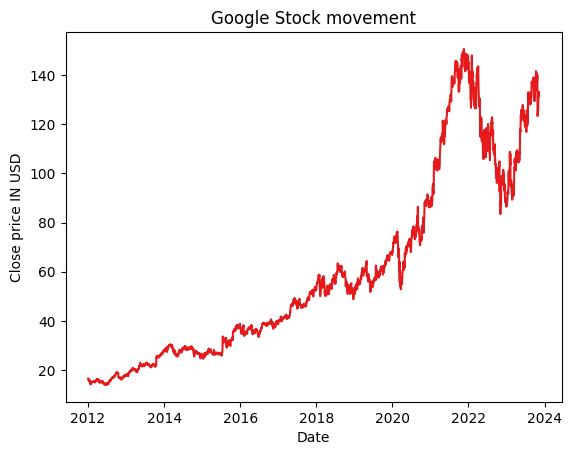

In [19]:
plt.Figure(figsize=(13,6))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close price IN USD')
# plt.savefig('goog.png')
plt.title('Google Stock movement')
plt.show()

In [20]:
## creating a close column dataframe

data = df.filter(['Close'])
## convert the data into numpy array
dataset = data.values
## get number on which model will be trained
training_data_len = int(np.ceil(len(dataset)*.95))
training_data_len

2836

In [21]:
## perform data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [22]:
## create the scaled training dataset
train_data = scaled_data[0:int(training_data_len),:]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

if i<=61:
    print(x_train)
    print(y_train)
    print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [23]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [24]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))


In [25]:
## compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=1)


2776/2776 [==============================] - 178s 61ms/step - loss: 0.0028


In [26]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]

# Initialize lists for x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

# Create input sequences for testing
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array and reshape it
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Get model predictions and inverse transform them
predictions = scaler.inverse_transform(model.predict(x_test))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse


5/5 [==============================] - 2s 41ms/step


3.92814294427371

C:\Users\UMER COMPUTERS\AppData\Local\Temp\ipykernel_3956\2472436877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


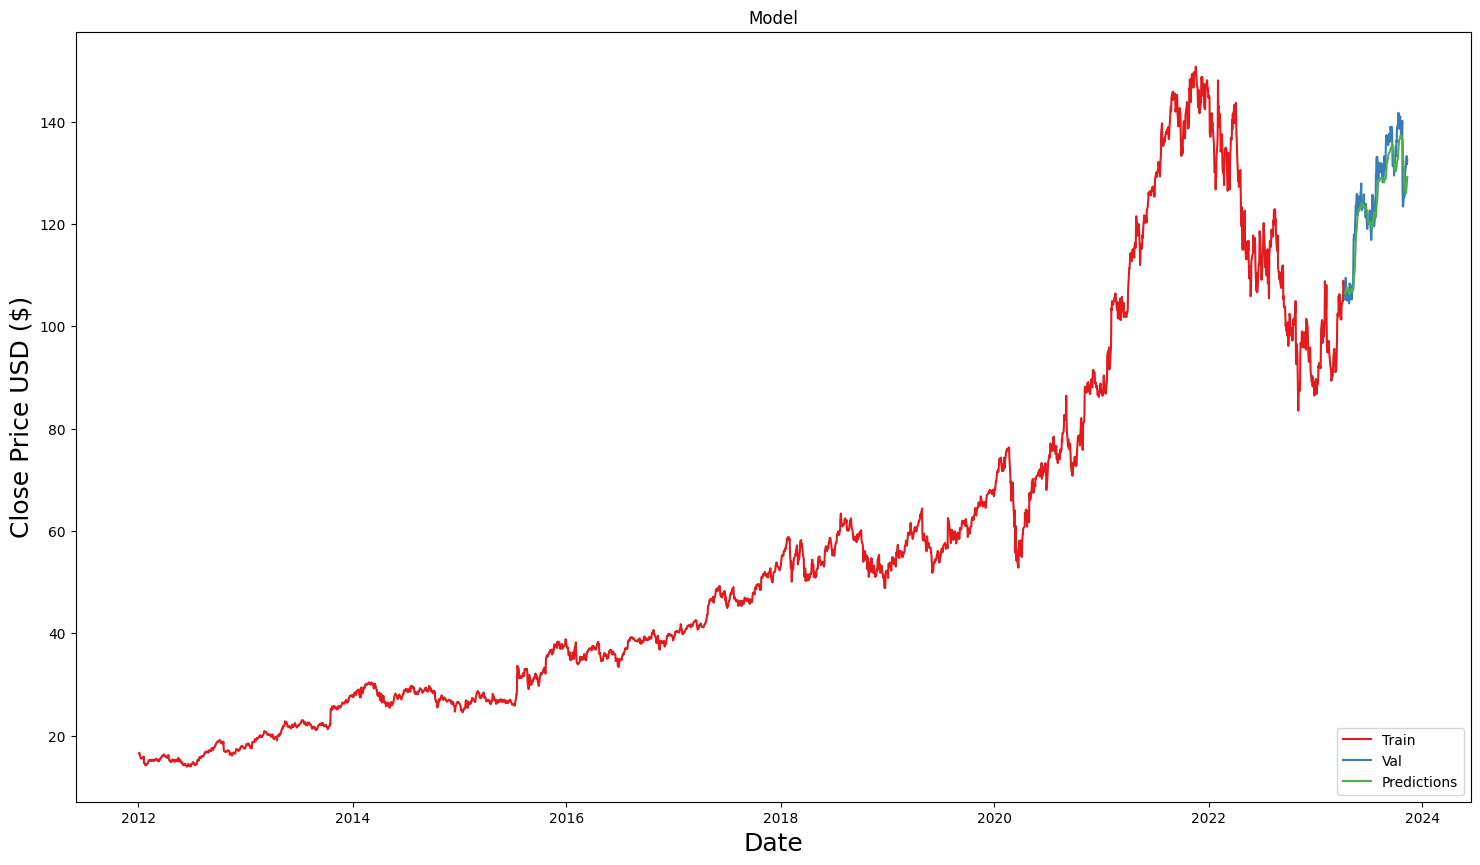

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(18,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('predicted.png')
plt.show()

In [29]:
valid

,Close,Predictions
Date,,
2023-04-12,105.220001,106.346756
2023-04-13,108.190002,106.494629
2023-04-14,109.459999,106.830421
2023-04-17,106.419998,107.358208
2023-04-18,105.120003,107.561768
...,...,...
2023-11-06,131.449997,126.102913
2023-11-07,132.399994,126.739586
2023-11-08,133.259995,127.577217


In [91]:
# Set up End and Start times for data grab
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# end = datetime.now()
# start = datetime(end.year - 2, end.month, end.day)

# for stock in tech_list:
#     globals()[stock] = yf.download(stock, start, end)
    
# company_list = [AAPL, GOOG, MSFT, AMZN]
# company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# for company, com_name in zip(company_list, company_name):
#     company["company_name"] = com_name
    
# df_1 = pd.concat(company_list, axis=0)

df_1.to_csv("stock_data.csv")